In [30]:
import pandas as pd
import numpy as np

data = pd.read_csv('new_data.csv')

columns_to_exclude = ['date(dd/mm/yy)']
X = data.drop(columns = columns_to_exclude)
print('Mean\n')
for col in X.columns:
    print(col,': ',np.mean(X[col].to_numpy()))
print('\n')
print('Standard Deviation\n')
for col in X.columns:
    print(col,': ',np.std(X[col].to_numpy()))

# print(data)

Mean

VSKP :  1.536986301369863
Temperature_1 :  28.42219178082192
Wind_Speed_1 :  2.0663013698630137
Distance_travelled_1 :  0.0
YLM :  12.139726027397261
Temperature_4 :  28.10767123287671
Wind_Speed_4 :  3.079178082191781
Distance_travelled_4 :  58.0
ANV :  16.802739726027397
Temperature_7 :  29.038904109589044
Wind_Speed_7 :  1.995068493150685
Distance_travelled_7 :  114.0
SLO :  16.643835616438356
Temperature_9 :  29.07780821917808
Wind_Speed_9 :  2.693972602739726
Distance_travelled_9 :  151.0
NDD :  26.063013698630137
Temperature_12 :  28.494246575342466
Wind_Speed_12 :  2.7084931506849315
Distance_travelled_12 :  224.0
BZA :  nan
Temperature_15 :  28.69013698630137
Wind_Speed_15 :  2.3753424657534246
Distance_travelled_15 :  351.0
WL :  39.92054794520548
Temperature_18 :  27.529041095890413
Wind_Speed_18 :  3.6172602739726027
Distance_travelled_18 :  559.0
KZJ :  33.26575342465753
Temperature_19 :  27.529041095890413
Wind_Speed_19 :  3.6172602739726027
Distance_travelled_19 :  

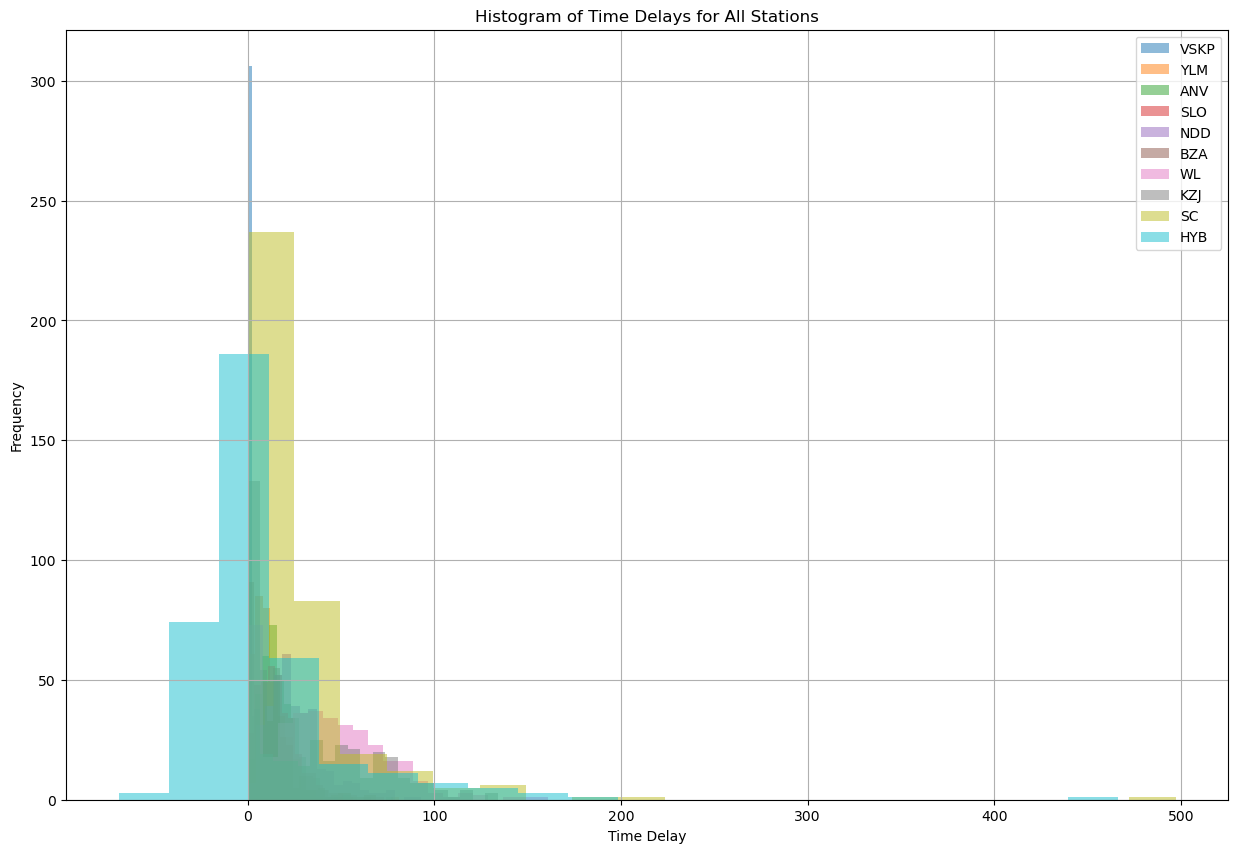

In [36]:
import matplotlib.pyplot as plt
station_delay = [col for col in data.columns if not any(x in col for x in ['Temperature', 'Wind_Speed', 'Distance_travelled', 'date'])]

# Plot histogram for each station in the updated data
plt.figure(figsize=(15, 10))

for station in station_delay:
    plt.hist(data[station].dropna(), bins=20, alpha=0.5, label=station)

plt.title('Histogram of Time Delays for All Stations')
plt.xlabel('Time Delay')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


[505.4234165528938, 480.6714470404915, 519.1670636702602, 506.56094401364976, 494.93945084222173, 505.1191047663907, 462.7773762836727, 462.7773762836727, 480.48759609380136, 480.48759609380136]


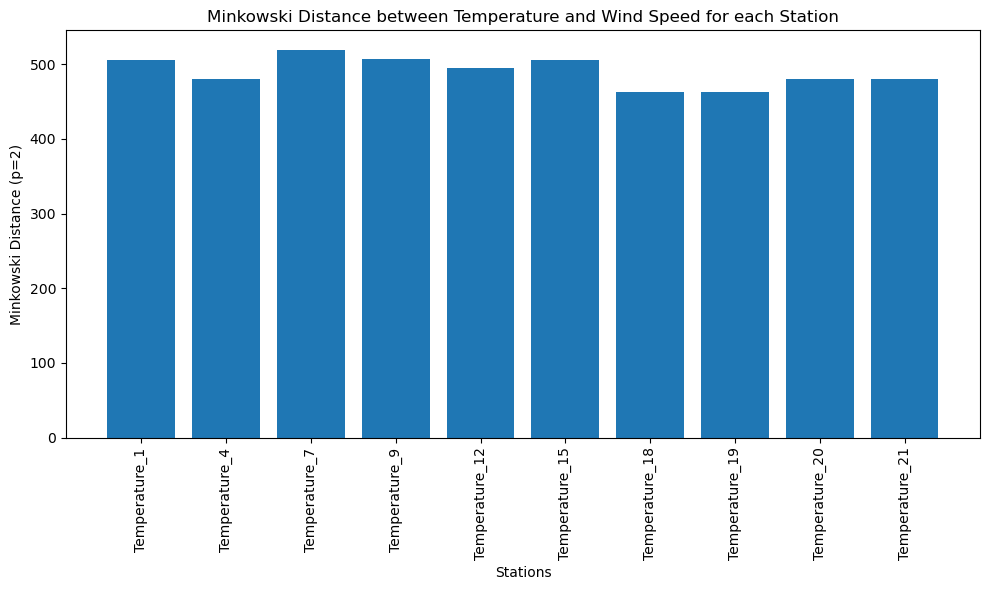

In [42]:
#minkowski distance between 
def mink(x, y, p):
    return np.sum(np.abs(x-y) ** p) ** (1/p)

temp_cols = [col for col in data.columns if 'Temperature' in col]
wdsp_cols = [col for col in data.columns if 'Wind_Speed' in col]

mkd = []

for x, y in zip(temp_cols, wdsp_cols):
    distance = mink(data[x], data[y], p = 2)
    mkd.append(distance)

print(mkd)

plt.figure(figsize = (10,6))
plt.bar(range(len(mkd)),mkd,tick_label = temp_cols)
plt.xlabel('Stations')
plt.ylabel('Minkowski Distance (p=2)')
plt.title('Minkowski Distance between Temperature and Wind Speed for each Station')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()